# Data Storytelling & Statistics
_Renaissance Experiential Learning Program_  
_Renaissance Learning, 2024_  
  
Now that we have some data and graphing powers to discover patterns and meaning in our data, it's time to start thinking about how we are going to share our discoveries with others.

## Today's Session

1. Housekeeping  
  
  
2. Data Storytelling
    - Story Arc
    - Understanding your audience
    - Notebook organization and markdown
  

3. Data Viz -- Follow Up
    - Color blindness
    - Cultural meaning
  
  
4. Statistics I
    - Central tendency
    - Variance and standard deviation


5. Wrap up

## Housekeeping

### Showcase Schedule

I'm still awaiting confirmation of the final time, but I'm fairly sure we're good for  
  
**Friday, August 16th, 11am – 12pm CT**

The EXL Showcase will last 1 hour, with each presentation running about 8 minutes.

### Weekly Review Forms

A couple of you forgot to submit a weekly review form!

### Slack postings

Let's engage more on Slack! Don't wait until the end of the week.

Get some conversations started in the `#python`, `#research`, `#data-visualization`, and `#random` channels today and tomorrow.

### Career Spotlight Sessions

- Thanks for those who attended the session with Jon Medin on Friday

- Upcoming session later this week
- Speaker and time are TBD

## Data Storytelling

Think of one of your favorite books from childhood...  
- Who is the main character / protagonist?
- What challenge do they face?
- What do you like about the book?

Let's take 2 minutes to think & respond in chat

### Elements of a good story

Good stories are memorable

- Use repeated language

- Fun, quirky, or bizarre

- Defy expectations

- Simple to share / re-tell

### Story Arc

#### Little Red Riding Hood - Powerpoint Edition

- Little Red Riding Hood (Red) has to walk 0.54 mi from Point A (home) to Point B (Grandma’s)

- Red meets Wolf, who (1) runs ahead to Grandma’s, (2) eats her, and (3) dresses in her clothes 

- Red arrives at Grandma’s at 2PM, asks her three questions

- Identified problem: after third question, Wolf eats Red

- Solution: vendor (Woodsman) employs tool (ax) 

- Expected outcome: Grandma and Red alive, wolf is not

![narrative arc](../images/narrative-arc)

![Little Red Riding Hood Arc](../images/little-red-riding-hood-arc.png)

### Understanding your audience

The same story can be adapted for different audiences...

<img src="../images/little-red-riding-hood.png" alt="Little Red Riding Hood" width="400"/>

<img src="../images/red-riding-hood.jpg.webp" alt="Red Riding Hood" width="400"/>

You will have to tell your data research story to 3 different audiences:

1. **Presentation:** General audience

2. **Paper:** Expert audience, but tell the story without code or exposing writing out all the math

3. **GitHub:** Job applications - technical focus, all technical details on display

### Discussion

- What makes your data story interesting?
- What is the climax?
- How do you want the audience to feel when they hear you present?

## Statistics I

Let's load the iris data set.

In [1]:
import ssl

import pandas as pd
import matplotlib.pyplot as plt

# need to change default https context when connecting to web server with an unverified ssl certificate
ssl._create_default_https_context = ssl._create_unverified_context

csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(csv_url, names = col_names)

print(iris.shape)
display(iris.head())

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Measures of Central Tendency

In [2]:
species = iris['species'].unique()
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

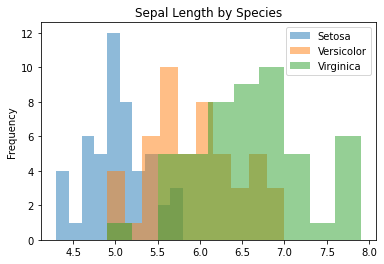

In [3]:
for s in species:
    
    short_name = s[5:].title()                   # remove "Iris-" by select the 6th letter to last
                                                 # then change to Title Case
    
    iris_species = iris[iris['species'] == s]    # subset of iris DataFrame
    
    iris_species['sepal_length'].plot.hist(
        bins=10,
        alpha=0.5,                               # "alpha" refers to the transparency of the color
        title='Sepal Length by Species',
        label=short_name,
        legend=True
    );
    

Let's look at the Virginica species

In [4]:
virginica = iris[iris['species'] == 'Iris-virginica']
virginica.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
125,7.2,3.2,6.0,1.8,Iris-virginica
126,6.2,2.8,4.8,1.8,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
133,6.3,2.8,5.1,1.5,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica


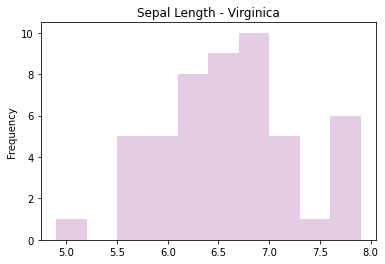

In [5]:
virginica['sepal_length'].plot.hist(
    bins=10, 
    title='Sepal Length - Virginica',
    color='purple', 
    alpha=0.2
);

#### Discuss with a partner: 

- Where is the *middle* of this dataset?
- What are some ways we can describe the middle?

- Mean
- Median
- Mode

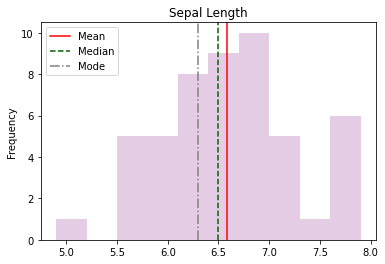

In [6]:
_mean = virginica['sepal_length'].mean()
_median = virginica['sepal_length'].median()
_mode = virginica['sepal_length'].mode()[0]

# main plot
virginica['sepal_length'].plot.hist(
    bins=10, 
    title='Sepal Length',
    color='purple',
    alpha=0.2,
    label='_nolegend_'     # hide from legend
)

# draw mean, median, and mode as vertical lines
plt.axvline(x=_mean, color='red', linestyle='-', label='Mean')
plt.axvline(x=_median, color='darkgreen', linestyle='--', label='Median')
plt.axvline(x=_mode, color='grey', linestyle='-.', label='Mode')

# add a legend for the lines
plt.legend(loc=2);

### Why so many stats?

Take 5 minutes to discuss with a partner and post your answers in Slack:
> What is an advantage or disadvantage of using...
> - Mean
> - Median
> - Mode



### Variance and Standard Deviation

[102.  97.  91. 104.  99.  89.  94.  88. 115. 106.  96. 107. 121.  89.
 106. 107. 104. 109. 105. 112. 102. 101.  76.  99.  95.  96.  85. 110.
 117.  95.]


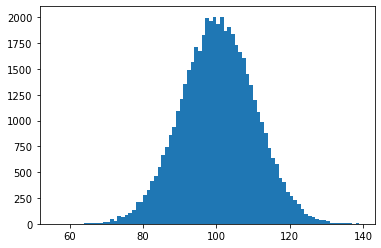

In [7]:
import numpy as np

mean = 100
std = 10

s = np.rint(np.random.normal(100, 10, 50000))
print(s[:30])

bins = int(s.max() - s.min())
plt.hist(x=s, bins=bins);

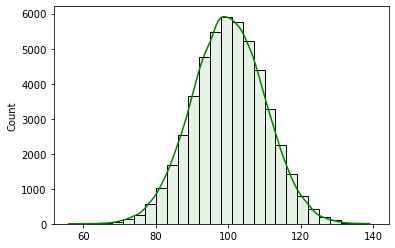

In [8]:
import seaborn as sns
sns.histplot(s, bins=bins, color='green', binwidth=3, alpha=0.1, kde=True);

## Wrap Up

### Todos

2. Post updates on your research project in the `#python`, `#research`, and `#data-visualization` channels

3. Reply to at least 2 others' postings
    - A question about the project
    - A suggestion
    - Anything else you want to say!

4. Read more: 
    - [Measures of central tendency](https://www.scribbr.com/statistics/central-tendency/)